In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
from tensorflow.keras.datasets import boston_housing


In [19]:
(X_train,y_train),(X_test,y_test)=boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [22]:
# define the model
#Experiment with deeper and wider networks
model = Sequential()
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))


In [23]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1792      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)



Epoch 1/100
11/11 [==============================] - 3s 33ms/step - loss: 553.1313 - mae: 21.6776 - val_loss: 588.5290 - val_mae: 22.4831
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 496.9102 - mae: 20.3160 - val_loss: 520.7441 - val_mae: 20.9673
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 426.7550 - mae: 18.5680 - val_loss: 429.9745 - val_mae: 18.7823
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 332.2783 - mae: 16.0235 - val_loss: 316.7239 - val_mae: 15.6855
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 227.0627 - mae: 12.7148 - val_loss: 200.6234 - val_mae: 11.6886
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 134.0137 - mae: 9.1301 - val_loss: 114.2409 - val_mae: 8.0611
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 81.3617 - mae: 6.9125 - val_loss: 76.2693 - val_mae: 6.7114
Epoch 8/100
11/11 [===========================

11/11 [==============================] - 0s 4ms/step - loss: 9.0835 - mae: 2.0853 - val_loss: 13.4227 - val_mae: 2.6431
Epoch 63/100
11/11 [==============================] - 0s 4ms/step - loss: 8.9689 - mae: 2.0744 - val_loss: 13.8687 - val_mae: 2.6202
Epoch 64/100
11/11 [==============================] - 0s 4ms/step - loss: 10.6883 - mae: 2.3820 - val_loss: 16.5821 - val_mae: 2.7789
Epoch 65/100
11/11 [==============================] - 0s 4ms/step - loss: 9.5615 - mae: 2.2294 - val_loss: 14.0131 - val_mae: 2.7403
Epoch 66/100
11/11 [==============================] - 0s 4ms/step - loss: 9.0418 - mae: 2.0899 - val_loss: 13.4398 - val_mae: 2.7017
Epoch 67/100
11/11 [==============================] - 0s 4ms/step - loss: 8.6883 - mae: 2.0443 - val_loss: 13.5050 - val_mae: 2.6182
Epoch 68/100
11/11 [==============================] - 0s 3ms/step - loss: 8.7900 - mae: 2.1128 - val_loss: 13.5579 - val_mae: 2.6218
Epoch 69/100
11/11 [==============================] - 0s 4ms/step - loss: 8.7300 

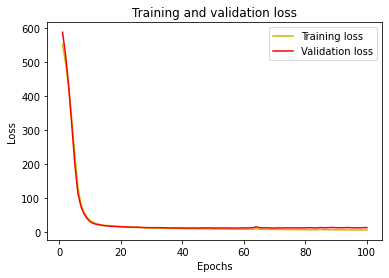

In [25]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [26]:
#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 2ms/step - loss: 27.1264 - mae: 3.1045
Mean squared error from neural net:  27.126359939575195
Mean absolute error from neural net:  3.10446834564209


In [27]:
############################################
#Predict on test data
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])


1/1 [==============================] - 0s 173ms/step
Predicted values are:  [[ 8.359353]
 [17.782333]
 [20.80447 ]
 [31.138664]
 [24.814913]]
Real values are:  [ 7.2 18.8 19.  27.  22.2]


In [28]:
### Linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  23.195599256422977
Mean absolute error from linear regression:  3.4641858124067166
